# eigengene methylation profile of module

The aim of this notebook is to compute the first PC of methylation module. 

Goals:
- load the updated data file that contain the community information
- compute the eigen profile (first PC) of the methylation module

In [1]:
suppressMessages({
    library(readr)
    library(ggplot2)
    library(dplyr)
    library(tidyr)
})

In [2]:
methylation <- read_csv('../../data/Figueroa/clusters/methyl-cluster-k30.csv')
head(methylation, n=2)

Parsed with column specification:
cols(
  .default = col_double(),
  Genes = col_character(),
  communities = col_integer()
)
See spec(...) for full column specifications.


Genes,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,⋯,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065,communities
LOC100133331,0.5656646,-0.2762509,0.5464723,1.390992,-1.250427,-0.7231627,-1.3639633,-0.6217651,-0.09007192,⋯,0.4027578,-0.64940248,-0.430032,0.2672083,2.583242,-0.0507937,-0.6815596,1.8492071,0.3190695,4
AK091100,0.8362348,0.9454242,1.0655506,-1.012361,-1.288259,-0.3199215,-0.3368407,-0.9481995,-0.63231572,⋯,0.3609546,0.09337669,-1.229339,-0.4294562,1.591340,-0.4957257,-1.2191908,0.7066319,0.1522136,4


## Compute the first principal component of each community

In [3]:
communities <- unique(methylation$communities)
table(methylation$communities)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
3467 2334 2327 2061 1660 1363 1331 1273  970  941  888  855  754  695  506  500 
  16   17   18   19 
 377  337   65   55 

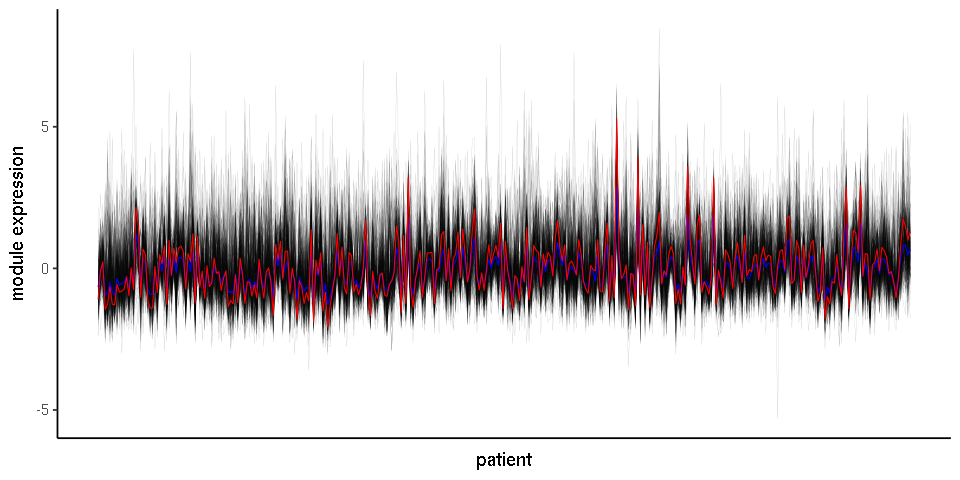

In [52]:
# Example with community 19
methylation.community19 = methylation %>%
  filter(communities == 16) %>%
  select(-c(communities))
res.pr = prcomp(t(methylation.community19[,-1]), scale=F, retx=T) 

methylation.community19 <- methylation.community19 %>%
  group_by(Genes) %>%
  mutate(i = seq(1, n())) %>% 
  unite(Genes, Genes, i, sep='.')

plot.data = data.frame(t(methylation.community19[,-1]))
colnames(plot.data) = unlist(methylation.community19[,1])
patients = seq(dim(plot.data)[1])
plot.data$patient = patients

community.median = data.frame(patient=plot.data$patient, median=apply(methylation.community19[,-1], 2, median)) # it looks like PC is in different scale compared with the original values
PC1 = data.frame(patient=plot.data$patient, PC1=-res.pr$x[,1]/res.pr$sdev[1])

options(repr.plot.width=8, repr.plot.height=4)
p <- plot.data %>%
  gather(probe, level, -patient) %>%
  ggplot(data=.) +
    geom_line(aes(x=patient, y=level, group=probe), size=0.05, alpha=0.2) +
    geom_line(data=community.median, aes(x=patient, y=median), color='blue', alpha=1, size=0.3) +
    geom_line(data=PC1, aes(x=patient, y=PC1), color='red', alpha=1, size=0.3) +
    theme_classic() + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) +
    xlab('patient') + ylab('module expression')
p